part 1

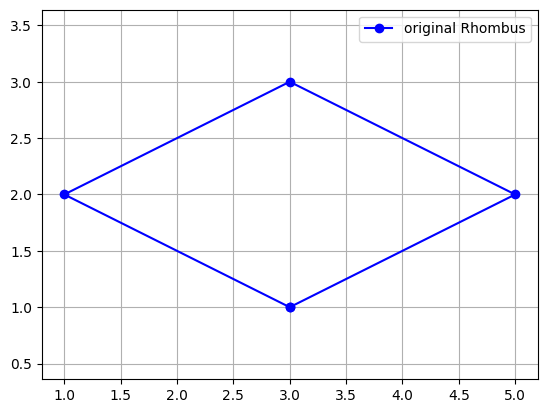

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def plot_shape(shape, label, color):
    shape_closed = np.vstack([shape, shape[0]])
    plt.plot(shape_closed[:,0], shape_closed[:,1], f'{color}o-', label=label)
    plt.grid()
    plt.axis('equal')
    plt.legend()
    plt.show()

def apply_transformation(shape, matrix):
    homogeneous_shape = np.c_[shape, np.ones(len(shape))]
    transformed_shape = (matrix @ homogeneous_shape.T).T[:, :2]
    return transformed_shape

rhombus = np.array([[3, 1], [5, 2], [3, 3], [1, 2]])
plot_shape(rhombus, "original Rhombus", 'b')

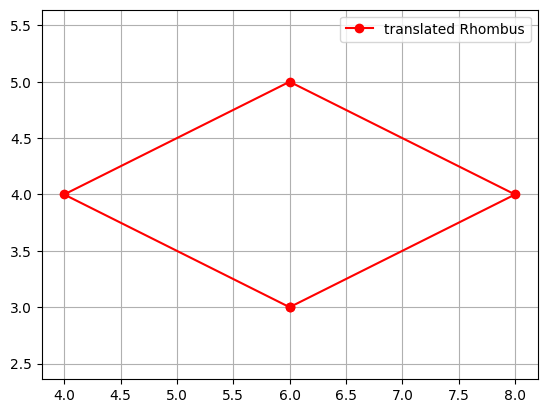

In [10]:
tx, ty = 3, 2
T = np.array([[1, 0, tx],
              [0, 1, ty],
              [0, 0, 1]])

translated_rhombus = apply_transformation(rhombus, T)
plot_shape(translated_rhombus, "translated Rhombus", 'r')

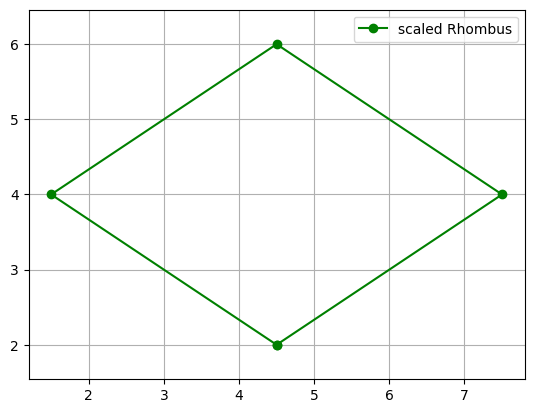

In [11]:
sx, sy = 1.5, 2
S = np.array([[sx, 0, 0],
              [0, sy, 0],
              [0, 0, 1]])

scaled_rhombus = apply_transformation(rhombus, S)
plot_shape(scaled_rhombus, "scaled Rhombus", 'g')

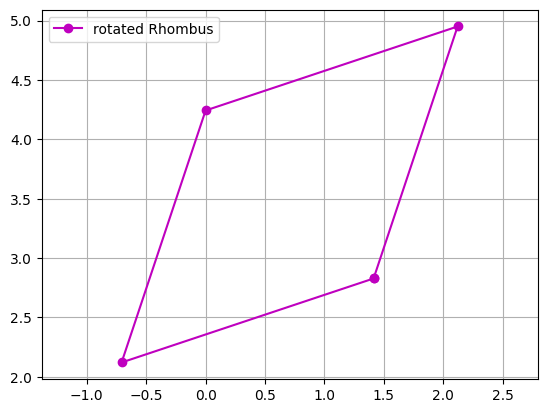

In [12]:
angle = 45
rad = np.radians(angle)
R = np.array([[np.cos(rad), -np.sin(rad), 0],
              [np.sin(rad),  np.cos(rad), 0],
              [0, 0, 1]])

rotated_rhombus = apply_transformation(rhombus, R)
plot_shape(rotated_rhombus, "rotated Rhombus", 'm')

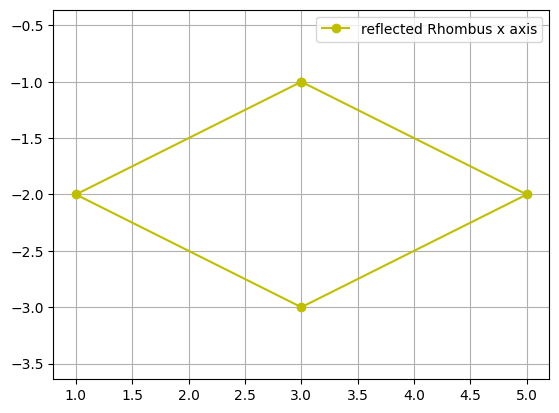

In [13]:
reflection_x = np.array([[1, 0, 0],
                         [0, -1, 0],
                         [0, 0, 1]])

reflected_rhombus = apply_transformation(rhombus, reflection_x)
plot_shape(reflected_rhombus, "reflected Rhombus x axis", 'y')

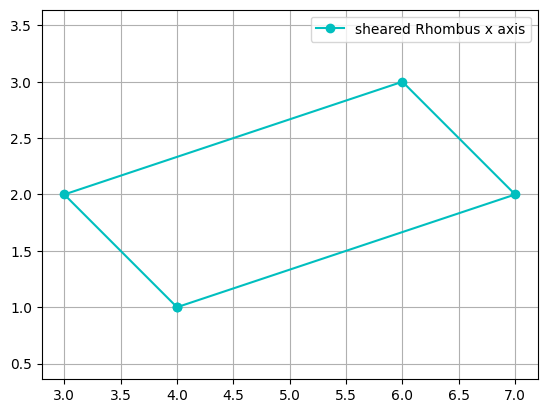

In [14]:
shx, shy = 1, 0
H = np.array([[1, shx, 0],
              [shy, 1, 0],
              [0, 0, 1]])

sheared_rhombus = apply_transformation(rhombus, H)
plot_shape(sheared_rhombus, "sheared Rhombus x axis", 'c')

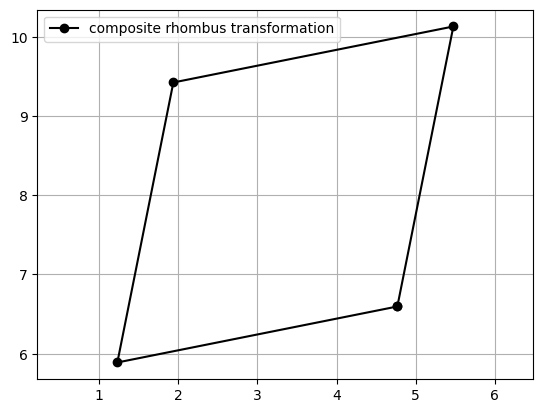

In [15]:
# composite
composite_transformation = T @ R @ S
composite_rhombus = apply_transformation(rhombus, composite_transformation)
plot_shape(composite_rhombus, "composite rhombus transformation", 'k')

Part 2

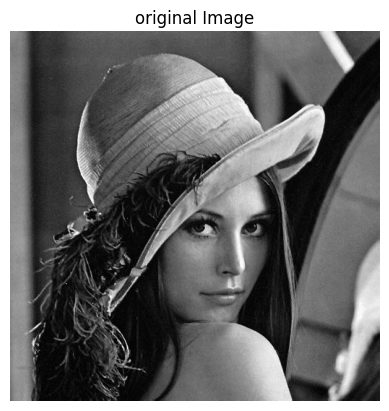

In [16]:
import cv2
image = cv2.imread('/content/Picture1.jpg')

def show_image(img, title="Image"):
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

show_image(image, "original Image")

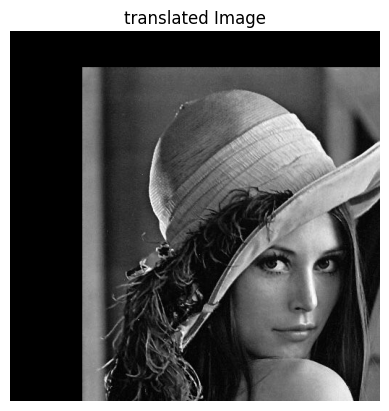

In [17]:
tx, ty = 100, 50
rows, cols = image.shape[:2]
T = np.float32([[1, 0, tx], [0, 1, ty]])
translated_image = cv2.warpAffine(image, T, (cols, rows))
show_image(translated_image, "translated Image")

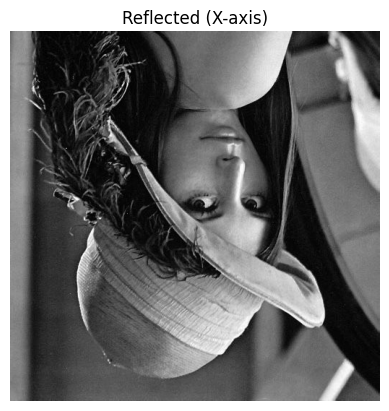

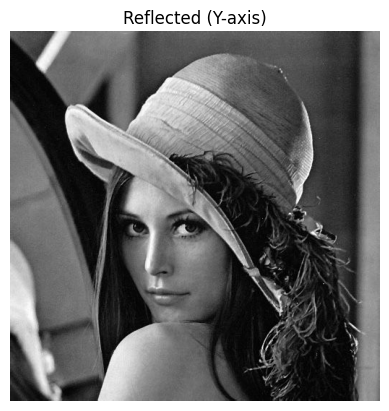

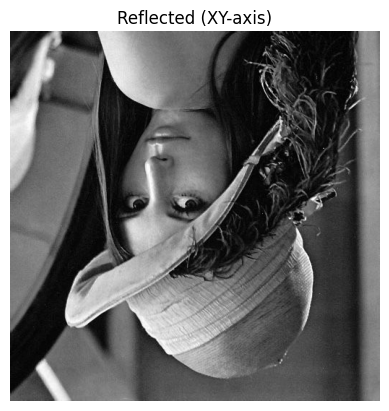

In [18]:
# along X-axis
reflected_x = cv2.flip(image, 0)
show_image(reflected_x, "Reflected (X-axis)")
# along Y-axis
reflected_y = cv2.flip(image, 1)
show_image(reflected_y, "Reflected (Y-axis)")
# along both axes
reflected_xy = cv2.flip(image, -1)
show_image(reflected_xy, "Reflected (XY-axis)")

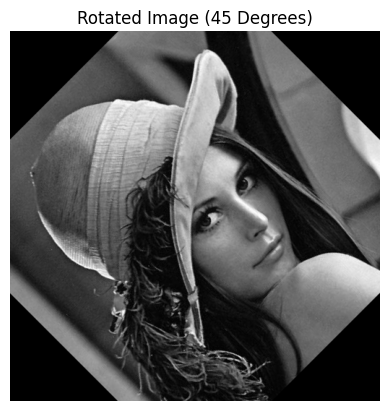

In [19]:
angle = 45
center = (cols // 2, rows // 2)
M = cv2.getRotationMatrix2D(center, angle, 1)
rotated_image = cv2.warpAffine(image, M, (cols, rows))

show_image(rotated_image, "Rotated Image (45 Degrees)")

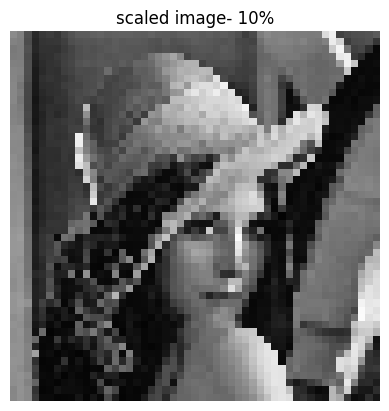

In [20]:
scale_x, scale_y = 0.1, 0.1  # Scaling factors
scaled_image = cv2.resize(image, None, fx=scale_x, fy=scale_y, interpolation=cv2.INTER_LINEAR)
show_image(scaled_image, "scaled image- 10%")

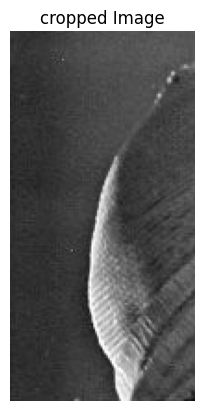

In [21]:
x, y, w, h = 50, 30, 100, 200
cropped_image = image[y:y+h, x:x+w]
show_image(cropped_image, "cropped Image")

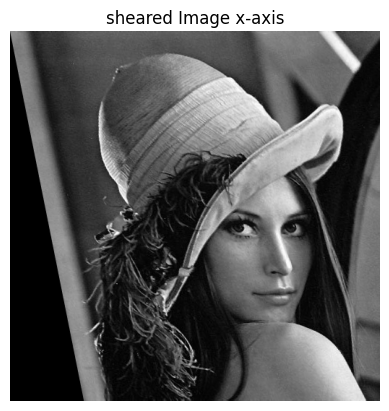

In [22]:
shear_x = 0.2  # shearing factor
M_x = np.float32([[1, shear_x, 0], [0, 1, 0]])
sheared_image_x = cv2.warpAffine(image, M_x, (cols, rows))
show_image(sheared_image_x, "sheared Image x-axis")

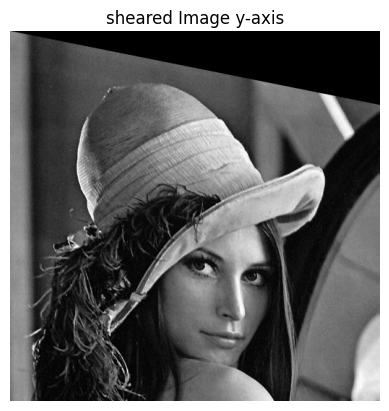

In [23]:
shear_y = 0.2
M_y = np.float32([[1, 0, 0], [shear_y, 1, 0]])
sheared_image_y = cv2.warpAffine(image, M_y, (cols, rows))
show_image(sheared_image_y, "sheared Image y-axis")